# What is the model improvement of data-augmentation in regards to different types of data? (audio,images,tabular,tabular (low-dimensionalty))

# Creation of synthetic data

In [13]:
from matplotlib import pyplot as plt
from scipy.stats import randint
import pandas as pd
import gc
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.utils import class_weight
from sklearn.manifold import TSNE

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_moons, make_blobs, make_circles
import os
import joblib as jl
import librosa
from IPython.display import Audio
from scipy.io import wavfile as wv
import torch
import torch.nn as nn
from tqdm import tqdm # progress ba


import random
import torchaudio
from torchaudio import transforms
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn


import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
import librosa
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from audiomentations import *


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K


In [488]:
amount_of_samples = 100

low_x1, high_x1 = 33,64
low_y1, high_y1 = 0,16
low_x2, high_x2 = 0,32
low_y2, high_y2 = 0,16

rx_1 = randint.rvs(low_x1, high_x1, size=int(amount_of_samples))
ry_1 = randint.rvs(low_y1, high_y1, size=int(amount_of_samples))
rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/2))
ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/2))

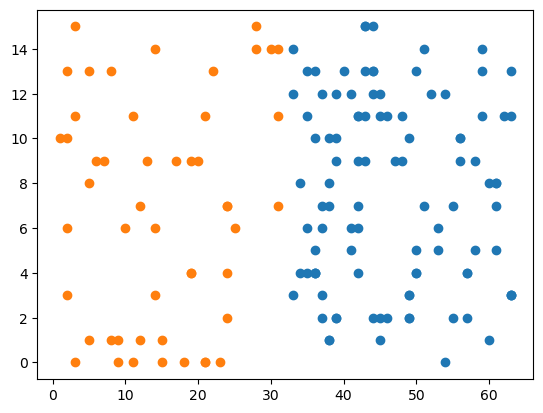

In [489]:
group_nr0 = ["0"] * amount_of_samples
group_nr1 = ["1"] * int(amount_of_samples/4)
first_group = list(zip(rx_1, ry_1, group_nr0))
second_group = list(zip(rx_2, ry_2, group_nr1))



plt.scatter(rx_1, ry_1)
plt.scatter(rx_2, ry_2)
plt.show()

In [490]:
for list_elem in second_group:
    first_group.append(list_elem)
print(first_group)

[(57, 4, '0'), (45, 12, '0'), (43, 13, '0'), (53, 5, '0'), (42, 7, '0'), (35, 6, '0'), (59, 11, '0'), (49, 3, '0'), (36, 5, '0'), (38, 8, '0'), (33, 3, '0'), (50, 4, '0'), (41, 5, '0'), (58, 9, '0'), (60, 8, '0'), (61, 7, '0'), (58, 5, '0'), (39, 2, '0'), (42, 6, '0'), (34, 4, '0'), (49, 2, '0'), (63, 3, '0'), (41, 6, '0'), (53, 6, '0'), (55, 2, '0'), (45, 1, '0'), (44, 2, '0'), (38, 1, '0'), (35, 11, '0'), (63, 11, '0'), (39, 9, '0'), (36, 10, '0'), (57, 4, '0'), (37, 2, '0'), (33, 14, '0'), (33, 12, '0'), (60, 1, '0'), (38, 7, '0'), (36, 4, '0'), (50, 4, '0'), (52, 12, '0'), (62, 11, '0'), (46, 11, '0'), (42, 4, '0'), (63, 3, '0'), (61, 8, '0'), (56, 9, '0'), (44, 13, '0'), (46, 2, '0'), (49, 3, '0'), (44, 13, '0'), (49, 10, '0'), (37, 12, '0'), (57, 2, '0'), (45, 2, '0'), (50, 5, '0'), (45, 11, '0'), (43, 15, '0'), (38, 1, '0'), (55, 7, '0'), (39, 12, '0'), (51, 7, '0'), (44, 12, '0'), (48, 11, '0'), (54, 0, '0'), (61, 5, '0'), (39, 2, '0'), (56, 10, '0'), (36, 4, '0'), (41, 12, '0'

In [491]:
block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])

In [492]:
display(block_data)

,x,y,group
0,57,4,0
1,45,12,0
2,43,13,0
3,53,5,0
4,42,7,0
...,...,...,...
120,15,0,1
121,1,10,1
122,5,8,1
123,3,0,1


In [493]:


minority_class_imbalance = [2,4,8]

amount_of_samples = 150

low_x1, high_x1 = 33,64
low_y1, high_y1 = 0,16
low_x2, high_x2 = 0,32
low_y2, high_y2 = 0,16

for imbalance in minority_class_imbalance:
    average_acc_none = 0
    average_acc_rand = 0
    average_acc_sm = 0
    average_acc_ada = 0
    print("imbalance #class1/#class2")
    print(imbalance)
    rx_1 = randint.rvs(low_x1, high_x1, size=int(amount_of_samples))
    ry_1 = randint.rvs(low_y1, high_y1, size=int(amount_of_samples))
    rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/imbalance))
    ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/imbalance))

    group_nr0 = ["0"] * amount_of_samples
    group_nr1 = ["1"] * int(amount_of_samples/imbalance)
    first_group = list(zip(rx_1, ry_1, group_nr0))
    second_group = list(zip(rx_2, ry_2, group_nr1))

    for list_elem in second_group:
        first_group.append(list_elem)

    block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])



    for random_state_idx in range(0,10):
        train, test = train_test_split(block_data, test_size=0.5, random_state= random_state_idx)
        X_train = train.drop(['group'], axis=1)
        X_test = test.drop(['group'], axis=1)

        y_train = train['group']
        y_test = test['group']
        
        
        
        
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_train, y_train)
        y_pred =  clf.predict(X_test)

        average_acc_none = accuracy_score(y_pred, y_test) + average_acc_none

        ros = RandomOverSampler(random_state=42)
        X_res_rand, y_res_rand = ros.fit_resample(X_train, y_train)


        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_res_rand, y_res_rand)
        y_pred =  clf.predict(X_test)

        average_acc_rand = accuracy_score(y_pred, y_test) + average_acc_rand




        sm = SMOTE(random_state=42)
        X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf.fit(X_res_sm, y_res_sm)
        y_pred =  clf.predict(X_test)

        average_acc_sm = accuracy_score(y_pred, y_test) + average_acc_sm


    print("Averaged score for no resampling: ")
    print(average_acc_none/10)

    print("Averaged score for rand resampling: ")
    print(average_acc_rand/10)

    print("Averaged score for smote resampling: ")
    print(average_acc_sm/10)



    

imbalance #class1/#class2
2
Averaged score for no resampling: 
0.9814159292035398
Averaged score for rand resampling: 
0.9876106194690266
Averaged score for smote resampling: 
0.9884955752212388
imbalance #class1/#class2
4
Averaged score for no resampling: 
0.9627659574468087
Averaged score for rand resampling: 
0.9648936170212767
Averaged score for smote resampling: 
0.9723404255319149
imbalance #class1/#class2
8
Averaged score for no resampling: 
0.9761904761904763
Averaged score for rand resampling: 
0.955952380952381
Averaged score for smote resampling: 
0.9833333333333332


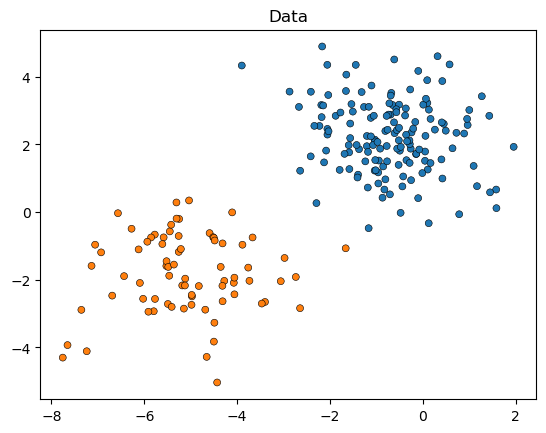

In [494]:
X, y = make_blobs( random_state=1, n_samples=[150,75] , center_box=[-5,5] , cluster_std= 1.1)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=False
).set_title("Data")
plt.show()

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
Imbalance rate: 
2
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
Type of dataset: 
moons
-------------------------------------------------------------------------------------------------------
Type of oversampler:
No sampling 
Average score: 
0.9640000000000001
-------------------------------------------------------------------------------------------------------
Type of oversampler:
Random sampler 
Average score: 
0.9

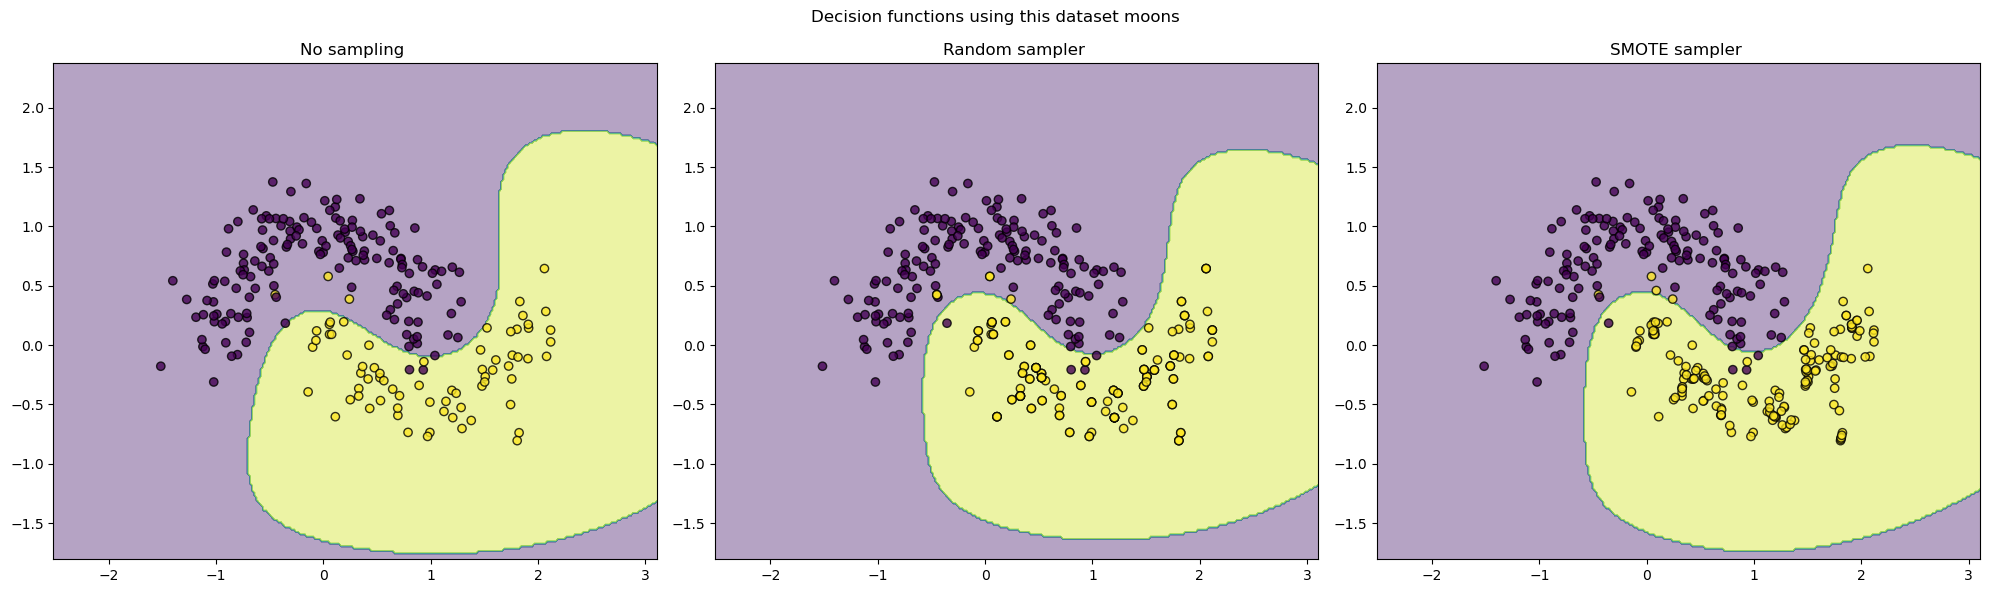

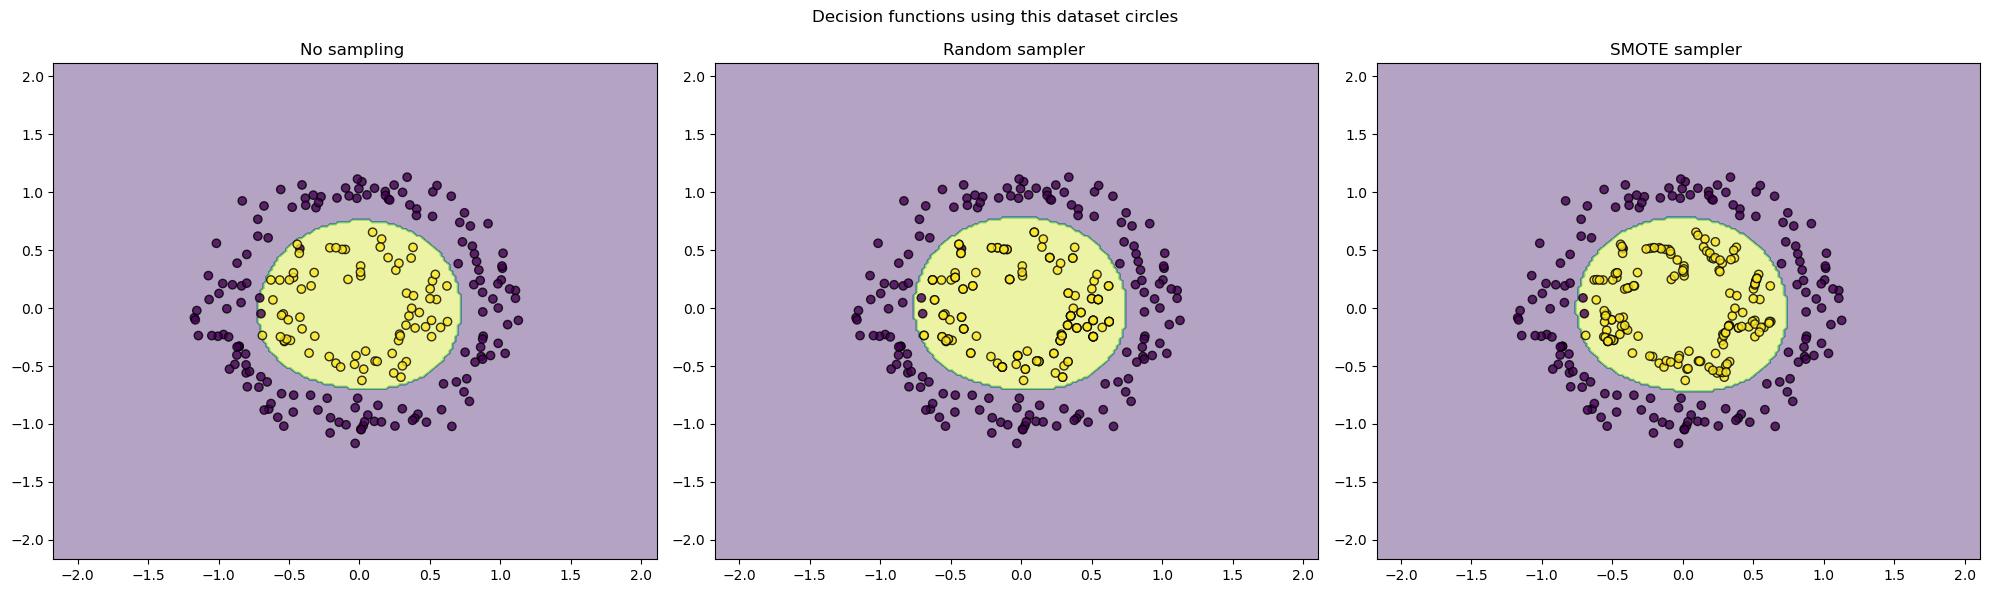

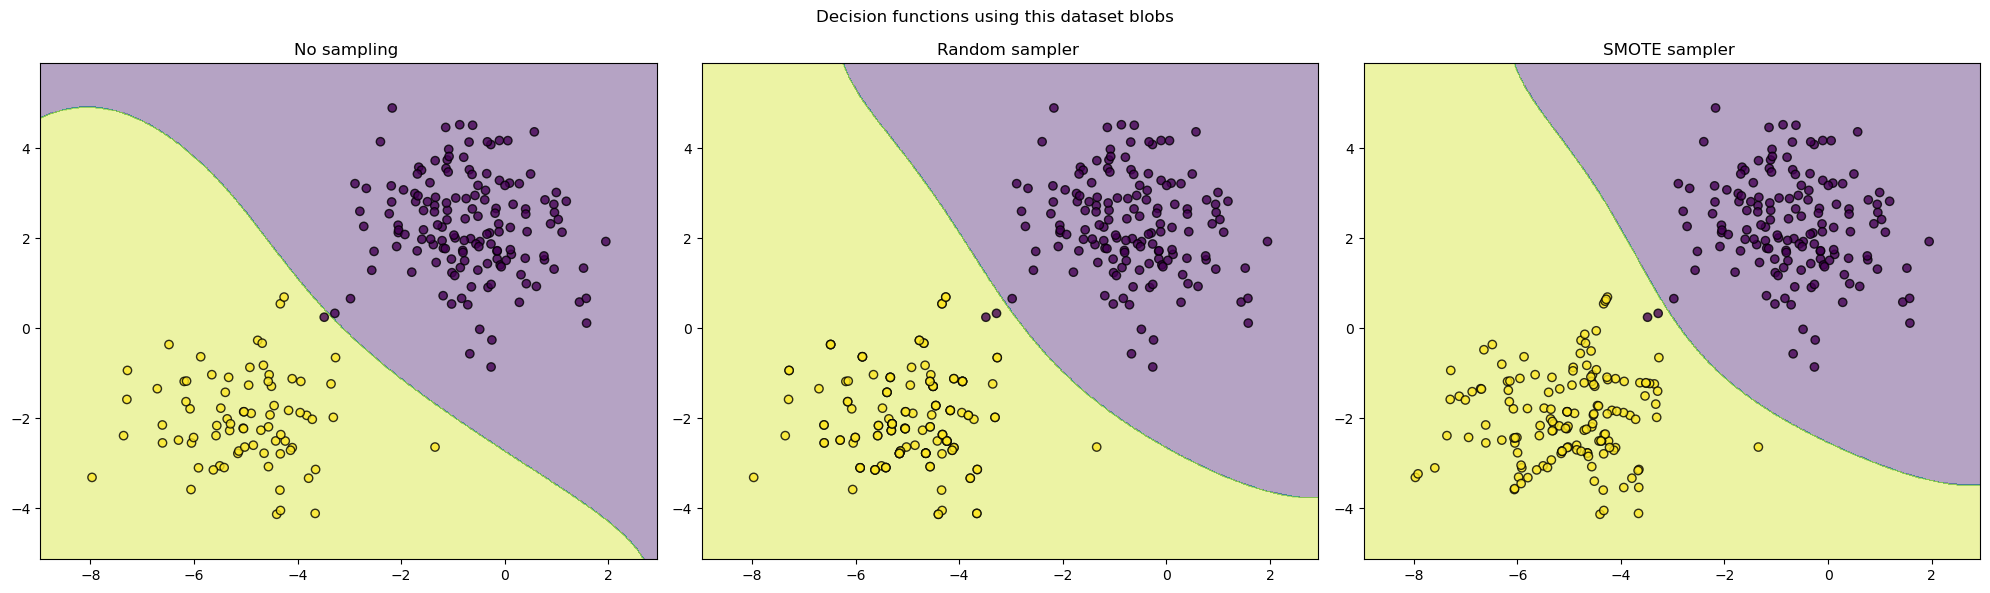

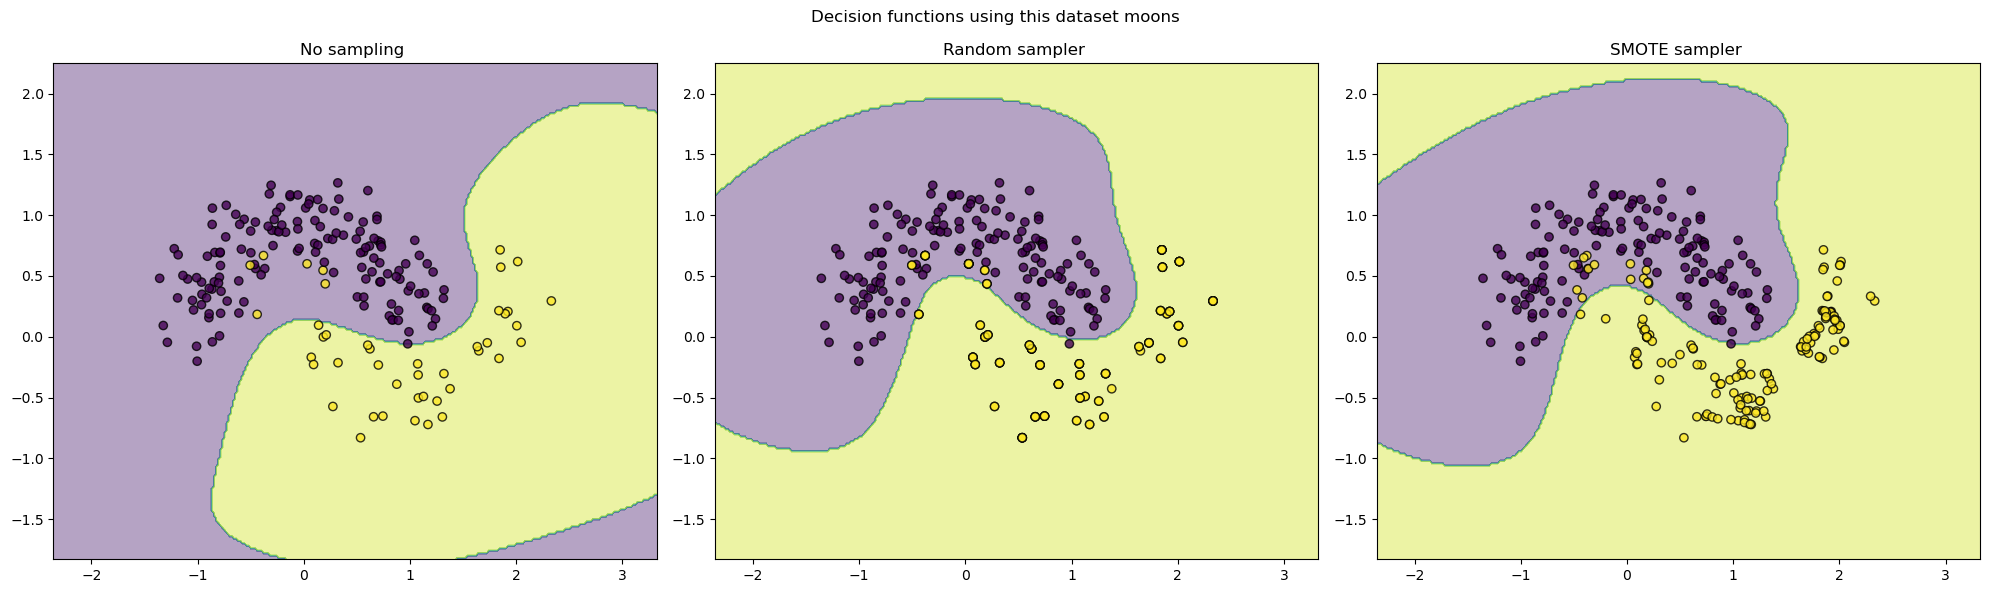

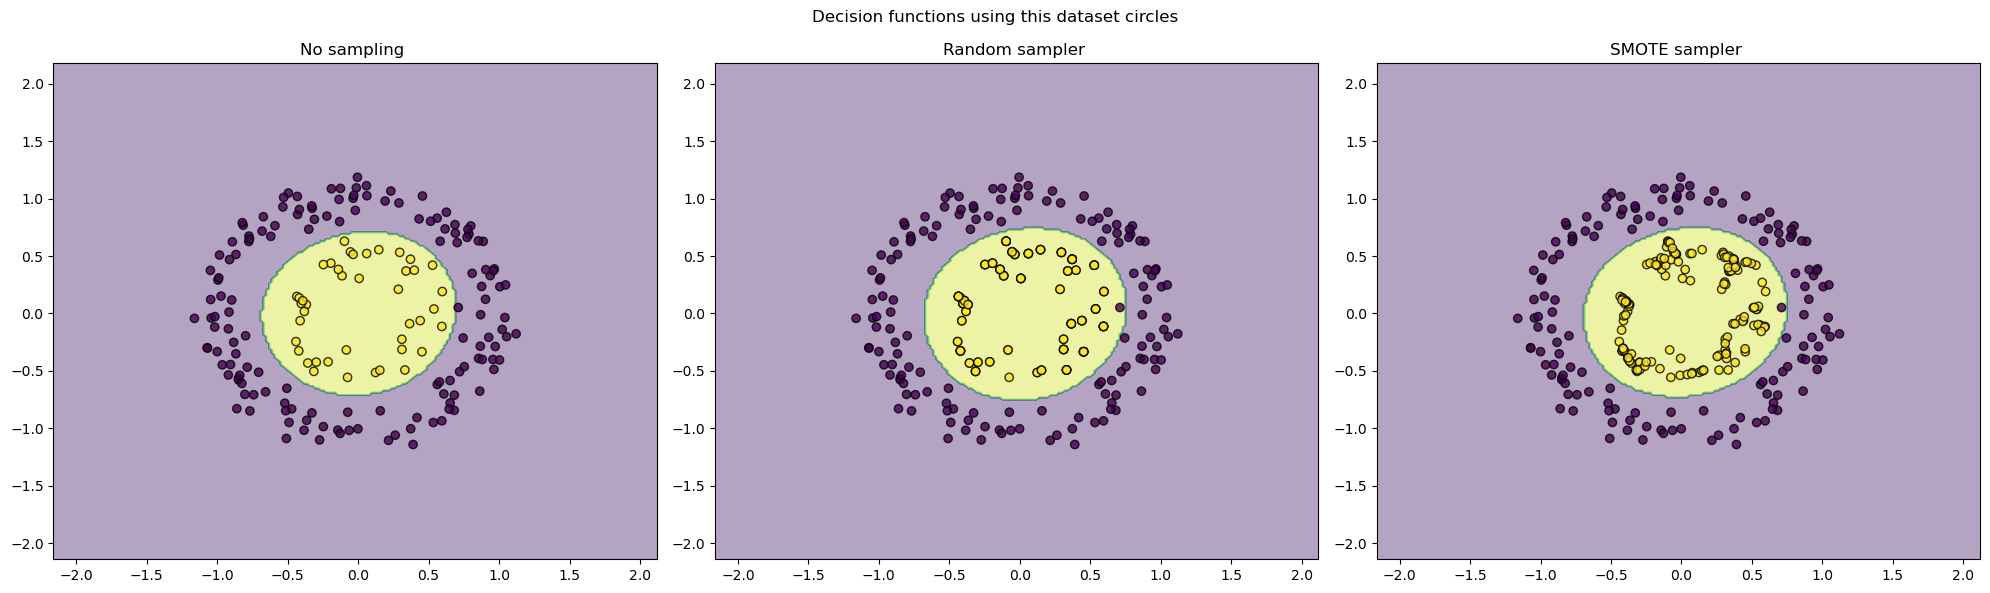

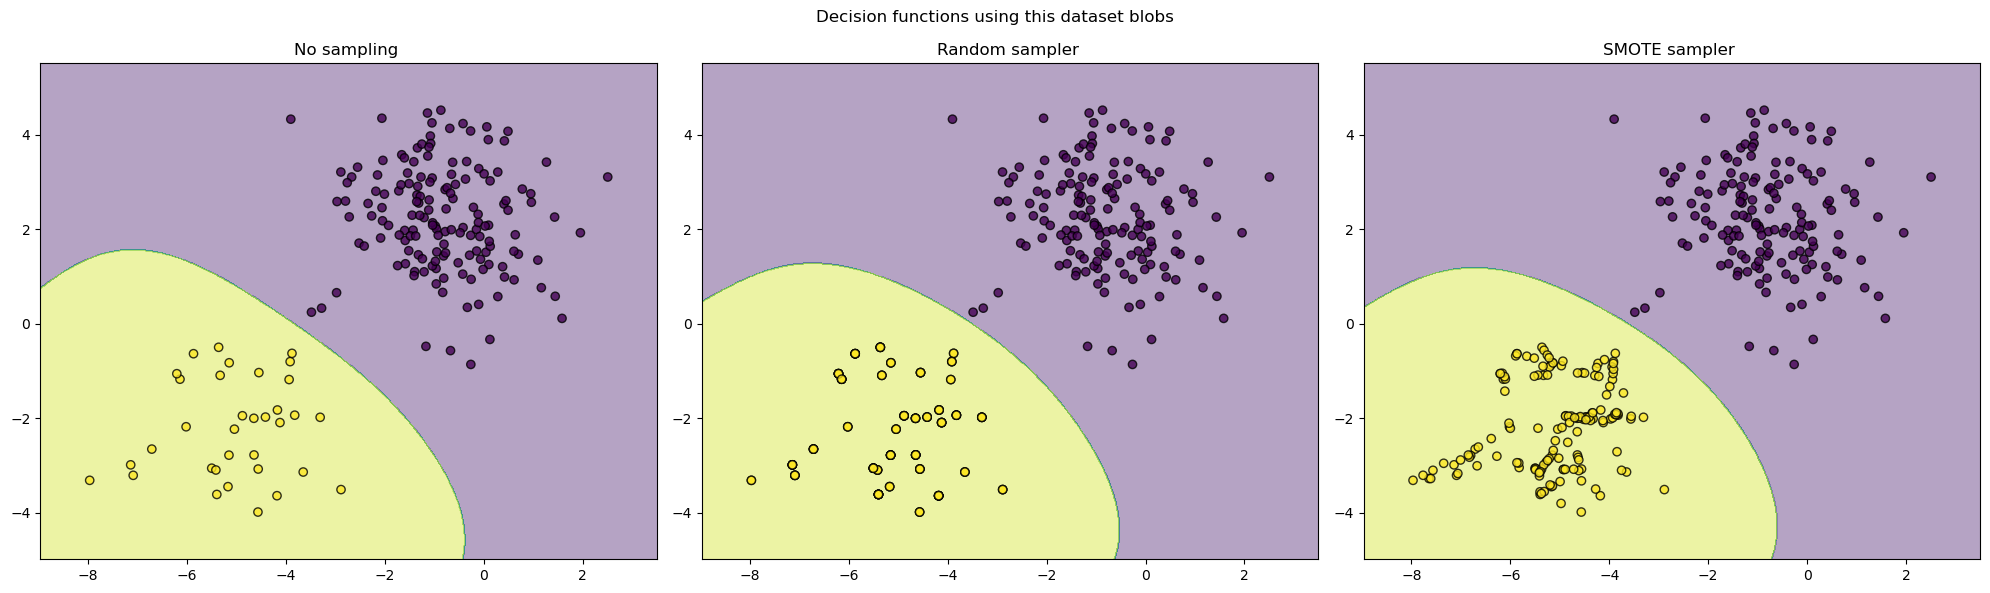

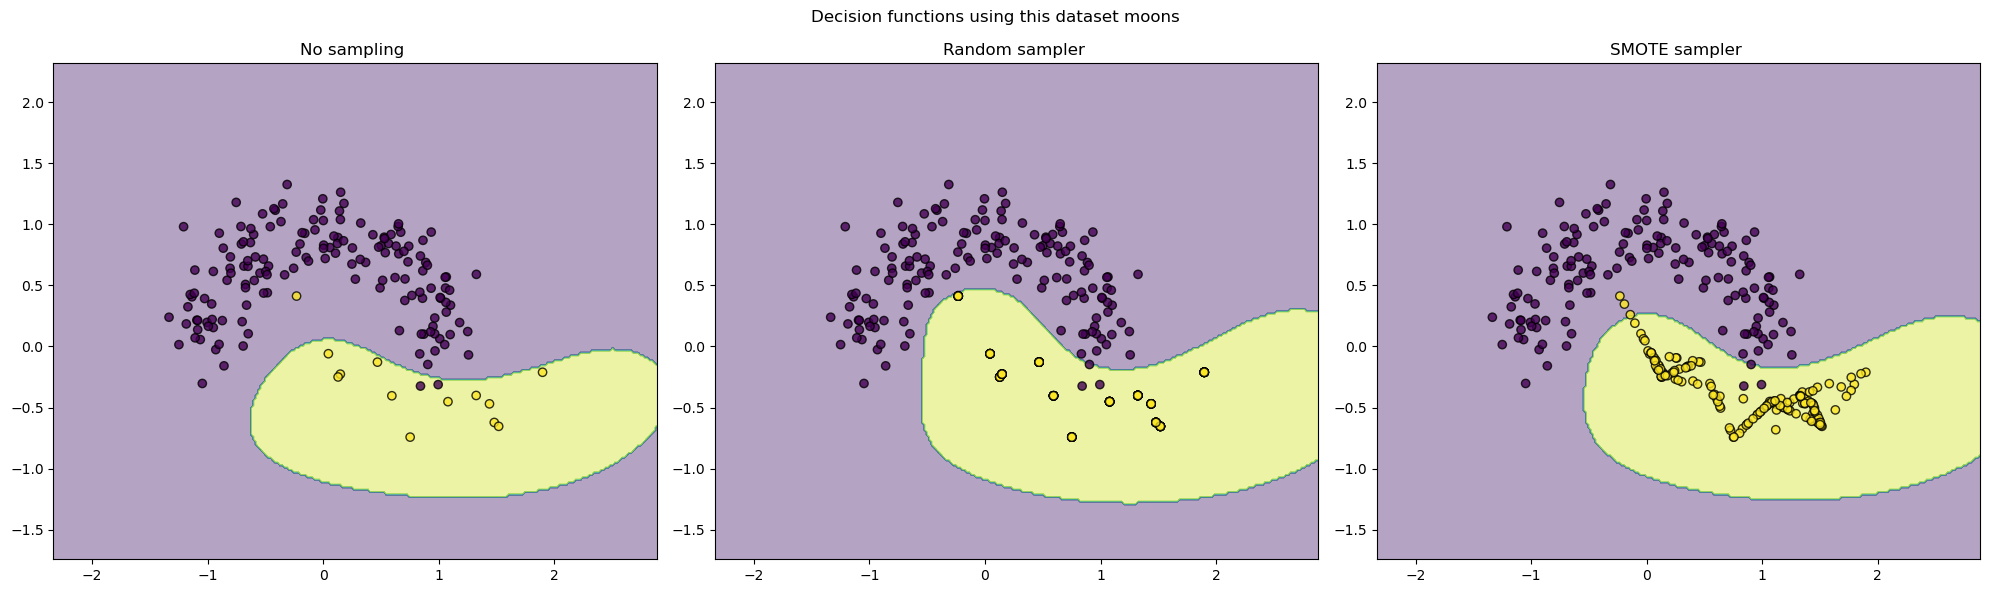

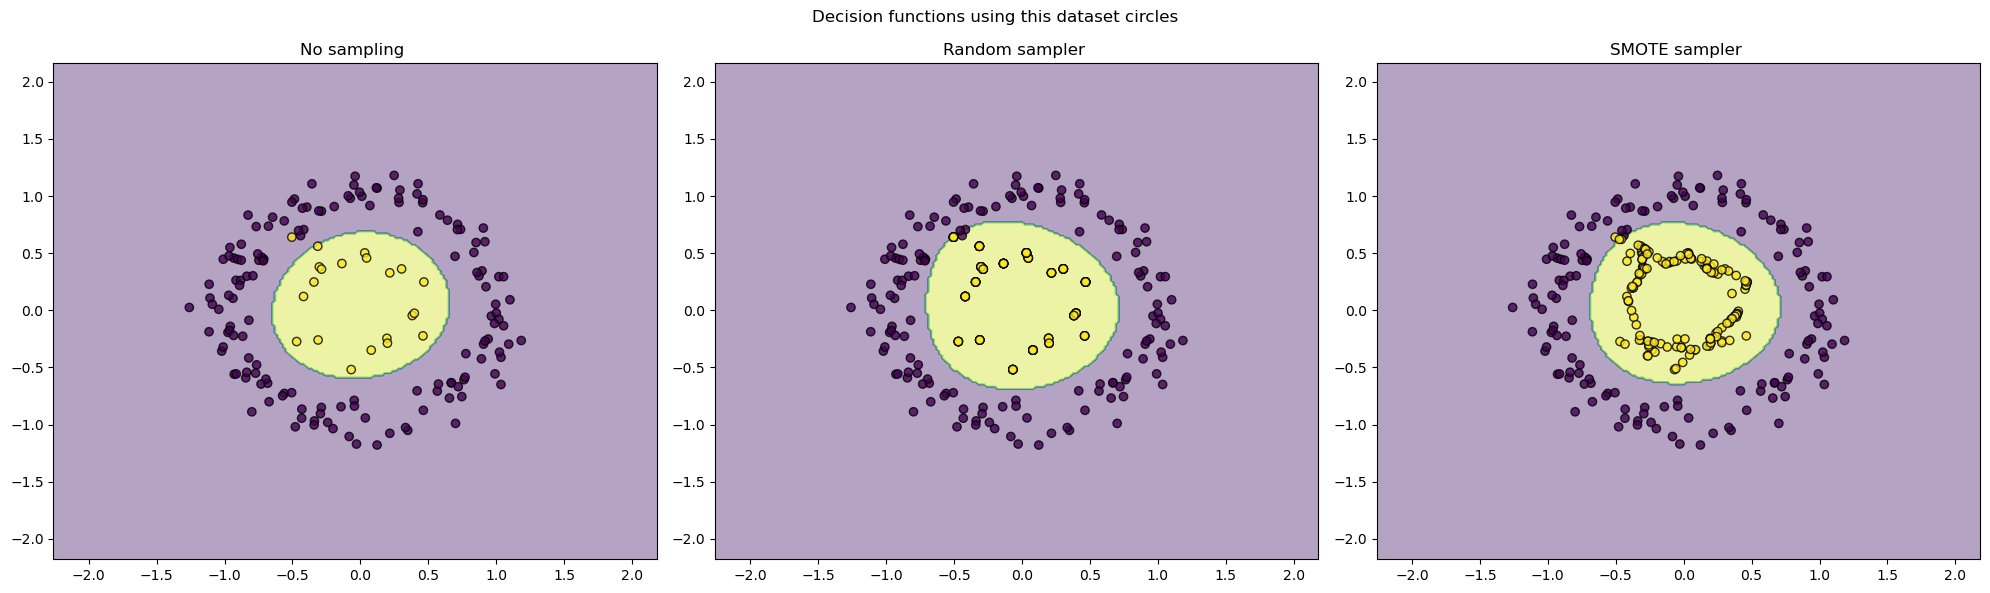

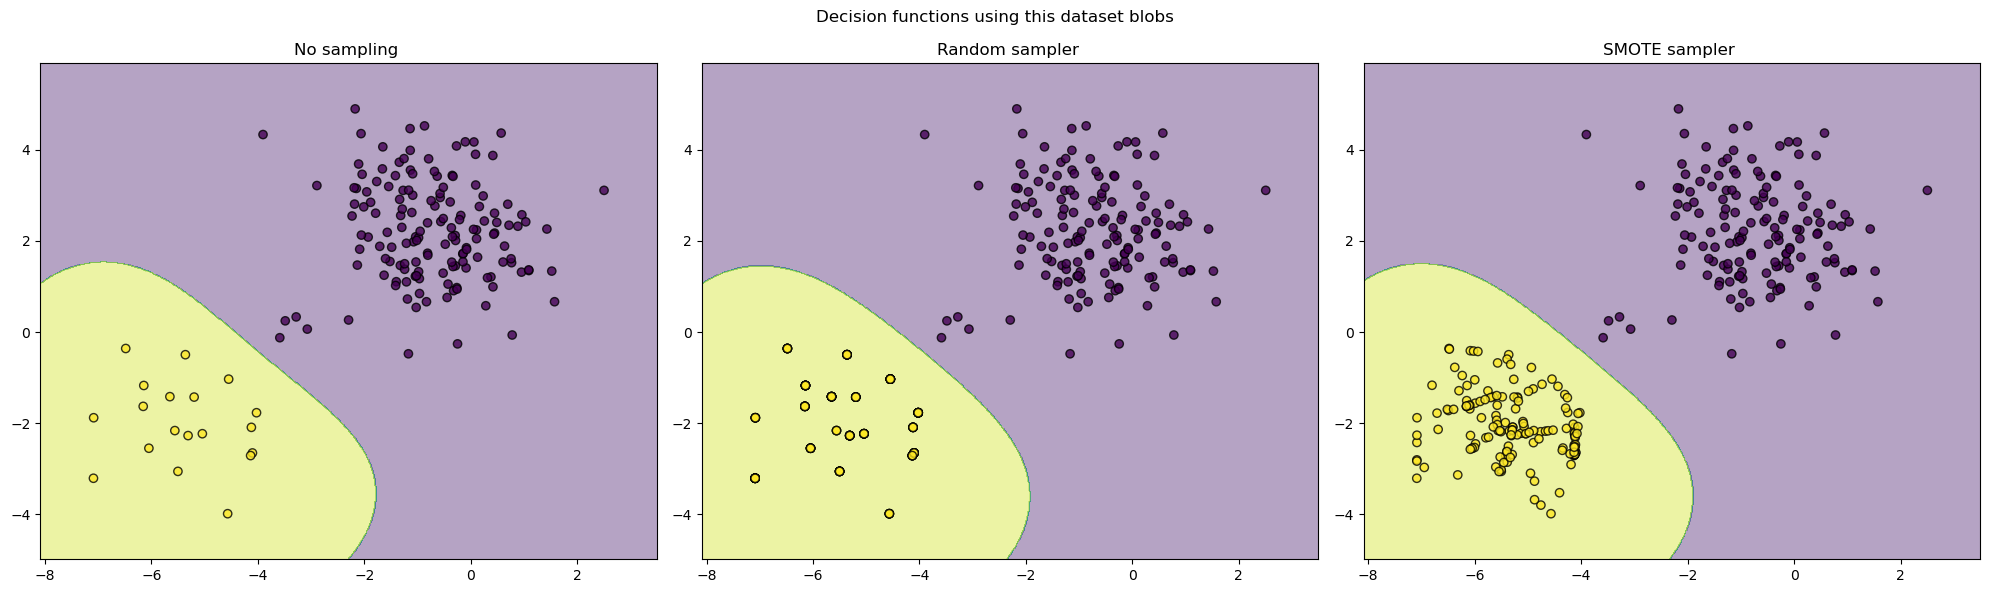

In [500]:
from imblearn.pipeline import make_pipeline


def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)



minority_class_imbalance = [2,4,8]

amount_of_samples = 300


models = {
    "No sampling ": make_pipeline(StandardScaler(),SVC(gamma='auto')),
    "Random sampler ": make_pipeline(StandardScaler(),RandomOverSampler(random_state=42),SVC(gamma='auto')),
    "SMOTE sampler ": make_pipeline(StandardScaler(),SMOTE(random_state=42),SVC(gamma='auto')),
}

for imbalance in minority_class_imbalance:
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------")
    print("Imbalance rate: ")
    print(imbalance)
    datasets = [
        make_moons(noise=0.2, random_state=0, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_circles(noise=0.1, factor=0.5, random_state=1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)]),
        make_blobs( random_state=1,  center_box=[-5,5] , cluster_std= 1.1, n_samples=[amount_of_samples,int(amount_of_samples/imbalance)])
    ]
    datasets_name = ["moons", "circles", "blobs"]
    
    for ds_cnt, ds in enumerate(datasets):
        print("-------------------------------------------------------------------------------------------------------")
        print("-------------------------------------------------------------------------------------------------------")
        print("Type of dataset: ")
        print(datasets_name[ds_cnt])
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
        for ax , (title,model) in zip(axs, models.items()):
            
            average_score = 0
            print("-------------------------------------------------------------------------------------------------------")
            print("Type of oversampler:")
            print(title)
            for random_state_idx in range(0,10):
                X, y = ds
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.5, random_state=random_state_idx
                )
                model.fit(X_train, y_train)
                
                y_pred =  model.predict(X_test)
                average_score = average_score + accuracy_score(y_pred, y_test)
            if title == "No sampling ":

                plot_decision_function(X_train, y_train, model, ax=ax, title=title)
                
            elif title == "Random sampler ":
                ros = RandomOverSampler(random_state=42)
                X_res, y_res = ros.fit_resample(X_train, y_train)
                plot_decision_function(X_res, y_res, model, ax=ax, title=title)
                
            
            elif title == "SMOTE sampler ":
                ros = SMOTE(random_state=42)
                X_res, y_res = ros.fit_resample(X_train, y_train)
                plot_decision_function(X_res, y_res, model, ax=ax, title=title)
                
                
            print("Average score: ")
            print(average_score/10)
        fig.suptitle("Decision functions using this dataset " + datasets_name[ds_cnt])
        fig.tight_layout()
                

        
    
    
    

# Audio

In [44]:
#https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs?datasetId=2749&sortBy=voteCount




In [45]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(128,128,3),
                            include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.save_weights('model.h5')

In [46]:


train_dir = 'catvsdog/cats_dogs/train'
test_dir = 'catvsdog/cats_dogs/test'
train_paths=[]
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        train_paths+=[(os.path.join(dirname, filename))]
test_paths=[]
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        test_paths+=[(os.path.join(dirname, filename))]

In [47]:
Name=['dog','cat']
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))
Wrong_Name=['test','cats']
fix_mapping=dict(zip(Wrong_Name,Name))

In [ ]:
Amount_of_dogs = [85,63,30]
for dog_amount in Amount_of_dogs:
    amount_of_dogs = 0 
    train=[]
    train_labels=[]
    imbalance = 0
    #Data gathering
    for path in train_paths:
        label=path.split('\\')[-2]
        if label == "dog":
            imbalance = imbalance - 1
            amount_of_dogs = amount_of_dogs +1
        elif label == "cat":
            imbalance = imbalance + 1
        if amount_of_dogs > dog_amount:
            break
        y, sr = librosa.load(path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        img=log_mel_spectrogram
        img=cv2.resize(np.array(img),dsize=(128,128))
        X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        train+=[X*255]
        train_labels+=[normal_mapping[label]]

    test=[]
    test_labels=[]
    #data gathering
    for path in test_paths:
        label=path.split('\\')[-2]
        y, sr = librosa.load(path)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        img=log_mel_spectrogram
        img=cv2.resize(np.array(img),dsize=(128,128))
        X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        test+=[X*255]
        test_labels+=[normal_mapping[fix_mapping[label]]]
    
    trainX_no_augment = np.array(train)
    testX_no_augment = np.array(test)
    train_labels_no_augment = np.array(train_labels)
    test_labels_no_augment = np.array(test_labels)
    train_labels_no_augment = to_categorical(train_labels)
    test_labels_no_augment = to_categorical(test_labels)
    
    
    model.load_weights('model.h5')

    his=model.fit(x= trainX_no_augment, y = train_labels_no_augment,
                  validation_data=(testX_no_augment,test_labels_no_augment),epochs=50)
    y_pred = model.predict(testX_no_augment)
    y_pred2 = np.argmax(y_pred,axis=1)
    ground = np.argmax(test_labels_no_augment,axis=1)
    print(classification_report(ground,y_pred2,target_names=Name,digits=4))

    cm = confusion_matrix(ground, y_pred2)
    ConfusionMatrixDisplay(cm, display_labels=["dog" , "cat"]).plot()
    
    
    model.save('modelentire.h5')
    # classification visualization
    model = load_model("modelentire.h5")


    model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = model2(testX_no_augment)
    print(features)
    features = np.nan_to_num(features)
    labels = np.argmax(model(testX_no_augment), axis=-1)
    tsne = TSNE(n_components=2).fit_transform(features)

    def scale_to_01_range(x):

        value_range = (np.max(x) - np.min(x))
        starts_from_zero = x - np.min(x)
        return starts_from_zero / value_range

    tx = tsne[:, 0]
    ty = tsne[:, 1]

    tx = scale_to_01_range(tx)
    ty = scale_to_01_range(ty)

    colors = ['red', 'blue']
    classes = ["cat" , "dog"]
    print(classes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(labels) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax.scatter(current_tx, current_ty, c=c, label=classes[idx])

    ax.legend(loc='best')
    plt.show()

    
    
    

    model.load_weights('model.h5')

    his=model.fit(x= trainX_no_augment, y = train_labels_no_augment,
                  validation_data=(testX_no_augment,test_labels_no_augment),epochs=50,  class_weight= { 0 : 125/dog_amount , 1 : dog_amount/125 })
    y_pred = model.predict(testX_no_augment)
    y_pred2 = np.argmax(y_pred,axis=1)
    ground = np.argmax(test_labels_no_augment,axis=1)
    print(classification_report(ground,y_pred2,target_names=Name,digits=4))

    cm = confusion_matrix(ground, y_pred2)
    ConfusionMatrixDisplay(cm, display_labels=["dog" , "cat"]).plot()
    
    


    augment = Compose([
        AddGaussianNoise(min_amplitude=0.0001, max_amplitude=0.01, p=0.5),
        TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
        PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
        Shift(min_fraction=-0.25, max_fraction=0.25, p=0.5),
    ])
    # dat augmentation
    while imbalance != 0:
        for path in train_paths:
            label=path.split('\\')[-2]
            if imbalance == 0:
                break
            elif label == "dog":
                y, sr = librosa.load(path)
                y = augment(samples=y, sample_rate=sr)
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
                log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
                img=log_mel_spectrogram
                img=cv2.resize(np.array(img),dsize=(128,128))
                X=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
                train+=[X*255]
                train_labels+=[normal_mapping[label]]
                imbalance = imbalance - 1


    trainX = np.array(train)
    testX = np.array(test)
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    count_dog = 0
    count_cat = 0

    for label in train_labels:
        if label[1] == 1:
            count_cat = count_cat + 1
        elif label[1] == 0:
            count_dog = count_dog + 1
    print(count_dog)
    print(count_cat)

    model.load_weights('model.h5')
    his=model.fit(x= trainX, y = train_labels,
                  validation_data=(testX,test_labels),epochs=50)

    y_pred = model.predict(testX)
    y_pred2 = np.argmax(y_pred,axis=1)
    ground = np.argmax(test_labels,axis=1)
    print(classification_report(ground,y_pred2,target_names=Name,digits=4))

    cm = confusion_matrix(ground, y_pred2)
    ConfusionMatrixDisplay(cm, display_labels=["dog" , "cat"]).plot()
    gc.collect()

C:\Users\Stefano\AppData\Local\Temp\ipykernel_45708\2707272558.py:23: RuntimeWarning: invalid value encountered in true_divide
  X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
C:\Users\Stefano\AppData\Local\Temp\ipykernel_45708\2707272558.py:38: RuntimeWarning: invalid value encountered in true_divide
  X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


Epoch 1/50
7/7 [==============================] - 17s 1s/step - loss: 2.5948 - accuracy: 0.5952 - val_loss: 2.3440 - val_accuracy: 0.7463
Epoch 2/50
7/7 [==============================] - 4s 537ms/step - loss: 1.4717 - accuracy: 0.7190 - val_loss: 1.4942 - val_accuracy: 0.7164
Epoch 3/50
7/7 [==============================] - 4s 531ms/step - loss: 0.5971 - accuracy: 0.8571 - val_loss: 0.7706 - val_accuracy: 0.8806
Epoch 4/50
7/7 [==============================] - 4s 525ms/step - loss: 0.3799 - accuracy: 0.9095 - val_loss: 0.8902 - val_accuracy: 0.8507
Epoch 5/50
7/7 [==============================] - 4s 567ms/step - loss: 0.2169 - accuracy: 0.9333 - val_loss: 0.5077 - val_accuracy: 0.9104
Epoch 6/50
7/7 [==============================] - 4s 564ms/step - loss: 0.0770 - accuracy: 0.9619 - val_loss: 0.6927 - val_accuracy: 0.8507
Epoch 7/50
7/7 [==============================] - 4s 543ms/step - loss: 0.0836 - accuracy: 0.9762 - val_loss: 0.5208 - val_accuracy: 0.9104
Epoch 8/50
7/7 [======

In [9]:
dog_amount

^C
pipreqs  .


INFO: Successfully saved requirements file in .\requirements.txt
